In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

tf.__version__

'2.18.0'

In [3]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [4]:
unique_labels = np.unique(training_labels)
print("Label unik dalam dataset:", unique_labels)

Label unik dalam dataset: [0 1 2 3 4 5 6 7 8 9]


In [5]:
labels = ["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label : (labels6)

Image Pixel Array :
 [[  0   0   0   0   0   0   0   0   1   0   0  37 192 177 171 199  27   0   0   0   1   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0 135 230 162 155 253 164  14   0   0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0  64 152 232 207 195 155 157 201 227 224 221 172  94   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0 112 179 205 199 192 197 216 194 192 220 210 192 191 203 207 208  62   0   1   0   0   0]
 [  0   0   0   0   0  75 208 186 178 185 172 197 213 195 200 208 199 188 187 181 180 204 192   0   0   0   0   0]
 [  0   0   0   0   0 180 190 179 185 182 184 178 166 193 185 167 187 186 184 184 192 192 223  28   0   0   0   0]
 [  0   0   0   0   0 205 190 182 182 185 182 185 181 182 180 180 185 186 182 184 201 195 219  72   0   0   0   0]
 [  0   0   0   0   0 210 186 194 181 181 182 178 180 184 182 177 179 185 184 194 211 188 218  95   0   0   0   0]
 [  0   0   0   0   0 217 179 193 193 17

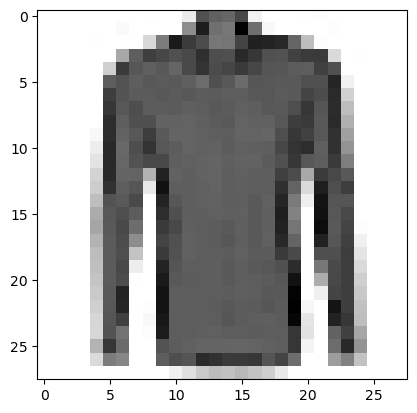

In [6]:
index = 40
np.set_printoptions(linewidth=320)
print(f'label : (labels{training_labels[index]})')
print(f'\nImage Pixel Array :\n {training_images[index]}')

plt.imshow(training_images[index], cmap='Greys')

In [7]:
# Normalizing
training_images = training_images / 255.0
test_images = test_images / 255.0

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])
model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7772 - loss: 0.6368
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8637 - loss: 0.3790
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8766 - loss: 0.3385
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8840 - loss: 0.3156
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8943 - loss: 0.2920


In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8834 - loss: 0.3306


[0.33645910024642944, 0.8788999915122986]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


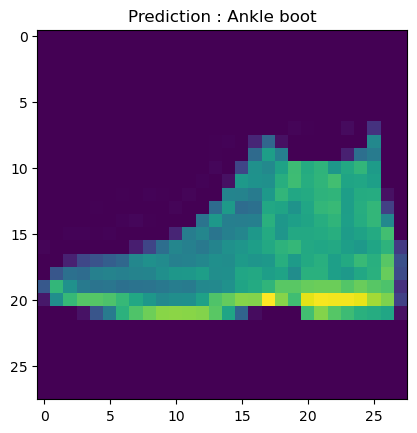

In [10]:
img = test_images[0]
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

plt.imshow(img)
plt.title("Prediction : %s" %(labels[np.argmax(predictions)]))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


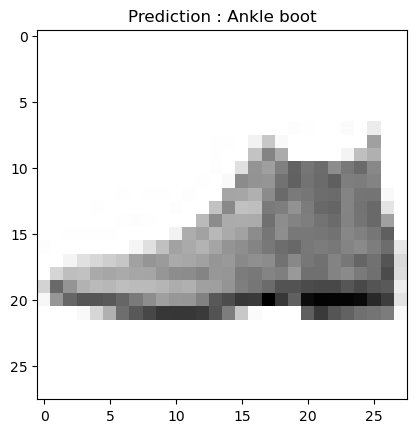

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


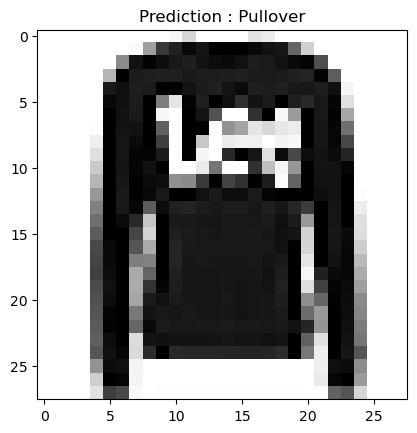

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


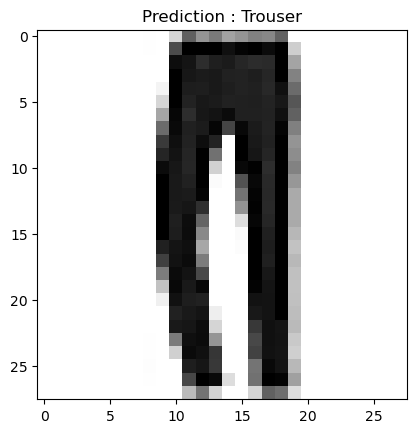

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


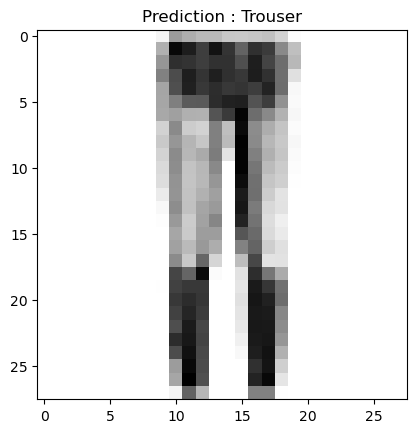

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


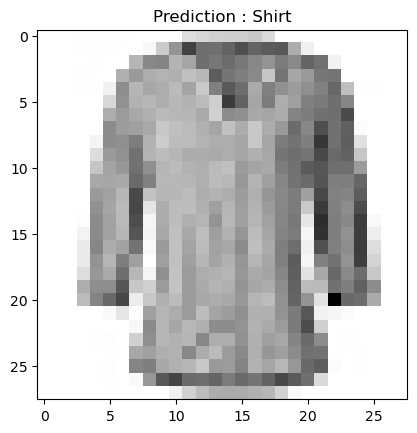

In [11]:
# Predict and display the first 5 test images and their predicted labels
for i in range(5):
    img = test_images[i]
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    plt.imshow(img, cmap='Greys')
    plt.title("Prediction : %s" % (labels[np.argmax(predictions)]))
    plt.show()